In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5.

Lima Centro:
  Lima
    Breña
    San Miguel
    Rimac
    Pueblo Libre
    Magdalena del Mar
    Jesus Maria
    Lince
    San Isidro
    La Victoria

In [2]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup 

     |████████████████████████████████| 122kB 12.3MB/s eta 0:00:01


## 1. Create a data frame with the information of Neighborhoods

In [3]:
url = requests.get('https://es.wikipedia.org/wiki/Anexo:Distritos_de_Lima').text
soup = BeautifulSoup(url,'html.parser')

My_table=soup.find('table', class_='wikitable sortable')

In [4]:
districts = []
ubigeos = []
area = []
people = []
foundation = []
postal = []

for row in My_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==7:
        districts.append(cells[0].find(text=True))
        ubigeos.append(cells[1].find(text=True))
        area.append(cells[2].find(text=True))
        people.append(cells[3].find(text=True))
        foundation.append(cells[4].find(text=True))
        postal.append(cells[5].find(text=True))
print(districts[0:5])
print(ubigeos[0:5])
print(area[0:5])
print(people[0:5])
print(foundation[0:5])
print(postal[0:5])

['Ancón', 'Ate Vitarte', 'Barranco', 'Breña', 'Carabayllo']
['150102\n', '150103\n', '150104\n', '150105\n', '150106\n']
['299.22\n', '77.72\n', '3.33\n', '3.22\n', '346.88\n']
['62 928\n', '599 196\n', '34 378\n', '85 309\n', '333 045\n']
['18741029', '18570102', '18741026', '19490715', '18210804']
['02\n', '03\n', '04\n', '05\n', '06\n']


In [5]:
df=pd.DataFrame(districts,columns=['Neighborhood'])
df['Ubigeos']=ubigeos
df['Area']=area
df['People']=people
df['Foundation']=foundation
df['Postal_Code']=postal
df.head()

,Neighborhood,Ubigeos,Area,People,Foundation,Postal_Code
0,Ancón,150102\n,299.22\n,62 928\n,18741029,02\n
1,Ate Vitarte,150103\n,77.72\n,599 196\n,18570102,03\n
2,Barranco,150104\n,3.33\n,34 378\n,18741026,04\n
3,Breña,150105\n,3.22\n,85 309\n,19490715,05\n
4,Carabayllo,150106\n,346.88\n,333 045\n,18210804,06\n


In [6]:
df.shape

(43, 6)

In [7]:
# Remove: '\n' from Data
df['Ubigeos'] = df['Ubigeos'].str.replace(r'\n', '')
df['Area'] = df['Area'].str.replace(r'\n', '')
df['People'] = df['People'].str.replace(r'\n', '')
df['People'] = df['People'].str.replace(r' ', '')
df['Postal_Code'] = df['Postal_Code'].str.replace(r'\n', '')
df.head()

,Neighborhood,Ubigeos,Area,People,Foundation,Postal_Code
0,Ancón,150102,299.22,62928,18741029,02
1,Ate Vitarte,150103,77.72,599196,18570102,03
2,Barranco,150104,3.33,34378,18741026,04
3,Breña,150105,3.22,85309,19490715,05
4,Carabayllo,150106,346.88,333045,18210804,06


In [8]:
df.shape

(43, 6)

In [9]:
df_center = df[(df['Postal_Code'].isin(['01','04','05','11', '13', '14', '17', '18', '21', '27', '32', '33', '34', '41']))]
df_center = df_center.sort_values("Ubigeos", ascending=True)
df_center.reset_index(drop=True,inplace=True)
df_center.head()

,Neighborhood,Ubigeos,Area,People,Foundation,Postal_Code
0,Lima,150101,21.88,268352,18570102,01
1,Barranco,150104,3.33,34378,18741026,04
2,Breña,150105,3.22,85309,19490715,05
3,Jesús María,150113,4.57,75359,19631213,11
4,La Victoria,150115,8.74,173630,19210816,13


In [10]:
df_center['Address'] = df_center['Neighborhood'].astype(str)+', Lima, Peru' 
df_center.head()

,Neighborhood,Ubigeos,Area,People,Foundation,Postal_Code,Address
0,Lima,150101,21.88,268352,18570102,01,"Lima, Lima, Peru"
1,Barranco,150104,3.33,34378,18741026,04,"Barranco, Lima, Peru"
2,Breña,150105,3.22,85309,19490715,05,"Breña, Lima, Peru"
3,Jesús María,150113,4.57,75359,19631213,11,"Jesús María, Lima, Peru"
4,La Victoria,150115,8.74,173630,19210816,13,"La Victoria, Lima, Peru"


In [11]:
df_center1=df_center.assign(Latitude='', Longitude='')
df_center1.head()

,Neighborhood,Ubigeos,Area,People,Foundation,Postal_Code,Address,Latitude,Longitude
0,Lima,150101,21.88,268352,18570102,01,"Lima, Lima, Peru",,
1,Barranco,150104,3.33,34378,18741026,04,"Barranco, Lima, Peru",,
2,Breña,150105,3.22,85309,19490715,05,"Breña, Lima, Peru",,
3,Jesús María,150113,4.57,75359,19631213,11,"Jesús María, Lima, Peru",,
4,La Victoria,150115,8.74,173630,19210816,13,"La Victoria, Lima, Peru",,


In [12]:
from geopy.extra.rate_limiter import RateLimiter

In [13]:
geolocator = Nominatim(user_agent="ny_explorer")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

df_center1['Coord'] = df_center1['Address'].apply(geolocator.geocode)
df_center1['Latitude']=df_center1['Coord'].apply(lambda x: (x.latitude))
df_center1['Longitude']=df_center1['Coord'].apply(lambda x: (x.longitude))
df_center1.drop(['Coord'], axis=1, inplace=True)
df_center1.head()

#Another way to get Latitude and Longitude
#df_center['Latitude'] = df['Neighborhoods'].apply(geolocator.geocode).apply(lambda x: (x.latitude))

,Neighborhood,Ubigeos,Area,People,Foundation,Postal_Code,Address,Latitude,Longitude
0,Lima,150101,21.88,268352,18570102,01,"Lima, Lima, Peru",-12.062107,-77.036526
1,Barranco,150104,3.33,34378,18741026,04,"Barranco, Lima, Peru",-12.143959,-77.020268
2,Breña,150105,3.22,85309,19490715,05,"Breña, Lima, Peru",-12.059700,-77.050119
3,Jesús María,150113,4.57,75359,19631213,11,"Jesús María, Lima, Peru",-12.078186,-77.046412
4,La Victoria,150115,8.74,173630,19210816,13,"La Victoria, Lima, Peru",-12.073358,-77.016417


In [14]:
#Create a dataframe only with relevant information
lima_data=df_center1[['Neighborhood', 'Latitude', 'Longitude']]
lima_data

,Neighborhood,Latitude,Longitude
0,Lima,-12.062107,-77.036526
1,Barranco,-12.143959,-77.020268
2,Breña,-12.059700,-77.050119
3,Jesús María,-12.078186,-77.046412
4,La Victoria,-12.073358,-77.016417
5,Lince,-12.086568,-77.036647
6,Magdalena del Mar,-12.095654,-77.068213
7,Pueblo Libre,-12.076639,-77.067858
8,Miraflores,-12.121498,-77.025906
9,San Borja,-12.096452,-76.995690


In [15]:
#Use geopy library to get the latitude and longitude values of Lima City.
address = 'Lima, Peru'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lima are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lima are -12.0621065, -77.0365256.


In [16]:
# create map of Lima using latitude and longitude values
map_lima = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(lima_data['Latitude'], lima_data['Longitude'], lima_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lima)  
    
map_lima

Miraflores in one of the most popular nieighborhoods in Lima, specially for foreign visitors, from the map we think the given location from geocoding application is not the best to get most popular venues, so we will move this location to a new one which will allow us to obtain better venues data for our analisys.

In [17]:
mir_newlat=-12.118814
mir_newlong=-77.040097

In [18]:
lima_data.loc[8, 'Latitude'] = mir_newlat
lima_data.loc[8, 'Longitude'] = mir_newlong

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
lima_data

,Neighborhood,Latitude,Longitude
0,Lima,-12.062107,-77.036526
1,Barranco,-12.143959,-77.020268
2,Breña,-12.059700,-77.050119
3,Jesús María,-12.078186,-77.046412
4,La Victoria,-12.073358,-77.016417
5,Lince,-12.086568,-77.036647
6,Magdalena del Mar,-12.095654,-77.068213
7,Pueblo Libre,-12.076639,-77.067858
8,Miraflores,-12.118814,-77.040097
9,San Borja,-12.096452,-76.995690


In [20]:
# create map of Lima using latitude and longitude values
map_lima = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(lima_data['Latitude'], lima_data['Longitude'], lima_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lima)  
    
map_lima

## 2. Create a venues data frame

In [21]:
CLIENT_ID = 'RXMC3MBV3FWUEZKRNTUBR15YR334VHS3TRN35BLMHPCCIZTI' # your Foursquare ID
CLIENT_SECRET = 'H1KDAB3QUWBLVVJBUSEH44AHA0G4AZQLCVTNS0RAXABBEBQ0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RXMC3MBV3FWUEZKRNTUBR15YR334VHS3TRN35BLMHPCCIZTI
CLIENT_SECRET:H1KDAB3QUWBLVVJBUSEH44AHA0G4AZQLCVTNS0RAXABBEBQ0


In [22]:
LIMIT=100

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
lima_venues = getNearbyVenues(names=lima_data['Neighborhood'],
                                   latitudes=lima_data['Latitude'],
                                   longitudes=lima_data['Longitude']
                                  )

Lima
Barranco
Breña
Jesús María
La Victoria
Lince
Magdalena del Mar
Pueblo Libre
Miraflores
San Borja
San Isidro
San Miguel
Santiago de Surco
Surquillo


In [25]:
lima_venues.sort_values(by='Venue Category', ascending=True, inplace=True)
lima_venues.reset_index(drop=True, inplace=True)
print(lima_venues.shape)
lima_venues.head()

(1388, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,San Miguel,-12.078656,-77.095283,Do it!,-12.081012,-77.082683,Accessories Store
1,Lima,-12.062107,-77.036526,Tony Roma's,-12.057406,-77.030081,American Restaurant
2,Lima,-12.062107,-77.036526,Chili's,-12.066808,-77.047318,American Restaurant
3,San Miguel,-12.078656,-77.095283,T.G.I. Fridays,-12.076010,-77.084234,American Restaurant
4,San Miguel,-12.078656,-77.095283,T.G.I. Friday's,-12.078503,-77.087624,American Restaurant


In [26]:
#lima_venues.to_csv('lima_venues.csv')

In [26]:
# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
mpl.style.use('ggplot')

Let's check how many duplicate venues we have

In [27]:
lima_venues.groupby('Venue').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,Venue Category
Venue,,,,,,
1087 Bistro,1,1,1,1,1,1
500 Grados,2,2,2,2,2,2
501 Pastelería Artesanal,1,1,1,1,1,1
96 ( Salchipapas),1,1,1,1,1,1
AELU - Asociación Estadio La Unión,1,1,1,1,1,1
...,...,...,...,...,...,...
hotel Andesmar,1,1,1,1,1,1
iShop,2,2,2,2,2,2
il monte,1,1,1,1,1,1


Let's clean the duplicated venues.

In [28]:
lima_venues = lima_venues.drop_duplicates(subset='Venue', keep="first")
lima_venues.shape

(903, 7)

In [77]:
#lima_venues.to_csv('lima_venues.csv')

In [29]:
print('There are {} uniques categories.'.format(len(lima_venues['Venue Category'].unique())))

There are 170 uniques categories.


## 3. Cluster Neighborhoods

In [30]:
# one hot encoding
lima_onehot = pd.get_dummies(lima_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lima_onehot['Neighborhood'] = lima_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [lima_onehot.columns[-1]] + list(lima_onehot.columns[:-1])
lima_onehot = lima_onehot[fixed_columns]

lima_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auditorium,...,Track Stadium,Trade School,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Water Park,Wings Joint,Women's Store,Yoga Studio
0,San Miguel,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lima,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lima,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,San Miguel,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,San Miguel,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [31]:
lima_grouped = lima_onehot.groupby('Neighborhood').mean().reset_index()
lima_grouped

,Neighborhood,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auditorium,...,Track Stadium,Trade School,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Water Park,Wings Joint,Women's Store,Yoga Studio
0,Barranco,0.000000,0.011236,0.000000,0.000000,0.011236,0.011236,0.000000,0.000000,0.000000,...,0.000000,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Breña,0.000000,0.000000,0.000000,0.000000,0.017241,0.034483,0.000000,0.017241,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Jesús María,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,La Victoria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Lima,0.000000,0.034483,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000
5,Lince,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027
6,Magdalena del Mar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385,0.046154,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000
7,Miraflores,0.000000,0.000000,0.012658,0.000000,0.000000,0.000000,0.012658,0.000000,0.000000,...,0.000000,0.012658,0.000000,0.037975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Pueblo Libre,0.000000,0.000000,0.000000,0.016949,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.016949,0.000000,0.000000,0.000000,0.000000,0.000000
9,San Borja,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.050000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.033333


### Let's print each neighborhood along with the top 5 most common venues

In [32]:
num_top_venues = 5

for hood in lima_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = lima_grouped[lima_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barranco----
                 venue  freq
0                 Park  0.09
1  Peruvian Restaurant  0.08
2                Hotel  0.07
3           Restaurant  0.06
4                Beach  0.03


----Breña----
                 venue  freq
0  Peruvian Restaurant  0.07
1                 Park  0.05
2            BBQ Joint  0.03
3                Hotel  0.03
4   Seafood Restaurant  0.03


----Jesús María----
                 venue  freq
0   Italian Restaurant  0.18
1              Theater  0.06
2     Sushi Restaurant  0.06
3  Peruvian Restaurant  0.06
4     Ramen Restaurant  0.03


----La Victoria----
                 venue  freq
0   Seafood Restaurant  0.16
1           Restaurant  0.07
2  Japanese Restaurant  0.06
3   Italian Restaurant  0.05
4  Peruvian Restaurant  0.05


----Lima----
                 venue  freq
0                Plaza  0.07
1   Chinese Restaurant  0.07
2  Peruvian Restaurant  0.05
3                  Bar  0.05
4               Bakery  0.05


----Lince----
                 venue

### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = lima_grouped['Neighborhood']

for ind in np.arange(lima_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lima_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barranco,Park,Peruvian Restaurant,Hotel,Restaurant,Café,Beach,Bakery,Gym / Fitness Center,Seafood Restaurant,Lounge
1,Breña,Peruvian Restaurant,Park,Hotel,BBQ Joint,Seafood Restaurant,Soccer Stadium,Restaurant,Plaza,Sports Club,Café
2,Jesús María,Italian Restaurant,Sushi Restaurant,Peruvian Restaurant,Theater,Burger Joint,Spanish Restaurant,Bookstore,Soup Place,Latin American Restaurant,Buffet
3,La Victoria,Seafood Restaurant,Restaurant,Japanese Restaurant,Peruvian Restaurant,Fried Chicken Joint,Italian Restaurant,Spa,Latin American Restaurant,Breakfast Spot,Market
4,Lima,Chinese Restaurant,Plaza,Peruvian Restaurant,Sandwich Place,Café,Bar,Bakery,Restaurant,Convenience Store,Theater


Clustering

In [35]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [36]:
# set number of clusters
kclusters = 5

lima_grouped_clustering = lima_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lima_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 1, 4, 1, 0, 0, 4, 3], dtype=int32)

In [37]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

lima_merged = lima_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
lima_merged = lima_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

lima_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lima,-12.062107,-77.036526,4,Chinese Restaurant,Plaza,Peruvian Restaurant,Sandwich Place,Café,Bar,Bakery,Restaurant,Convenience Store,Theater
1,Barranco,-12.143959,-77.020268,0,Park,Peruvian Restaurant,Hotel,Restaurant,Café,Beach,Bakery,Gym / Fitness Center,Seafood Restaurant,Lounge
2,Breña,-12.059700,-77.050119,0,Peruvian Restaurant,Park,Hotel,BBQ Joint,Seafood Restaurant,Soccer Stadium,Restaurant,Plaza,Sports Club,Café
3,Jesús María,-12.078186,-77.046412,2,Italian Restaurant,Sushi Restaurant,Peruvian Restaurant,Theater,Burger Joint,Spanish Restaurant,Bookstore,Soup Place,Latin American Restaurant,Buffet
4,La Victoria,-12.073358,-77.016417,1,Seafood Restaurant,Restaurant,Japanese Restaurant,Peruvian Restaurant,Fried Chicken Joint,Italian Restaurant,Spa,Latin American Restaurant,Breakfast Spot,Market


In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lima_merged['Latitude'], lima_merged['Longitude'], lima_merged['Neighborhood'], lima_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Analyze Venues

In [63]:
#Select only the 50th first venues
lima_venues_kind=((lima_venues['Venue Category'].value_counts()).sort_values(ascending=True)).iloc[138:188]
lima_venues_kind.tail()

Café                   28
Restaurant             32
Peruvian Restaurant    47
Seafood Restaurant     53
Park                   78
Name: Venue Category, dtype: int64

In [59]:
#lima_venues_kind.to_csv('lima_venues_kind.csv')

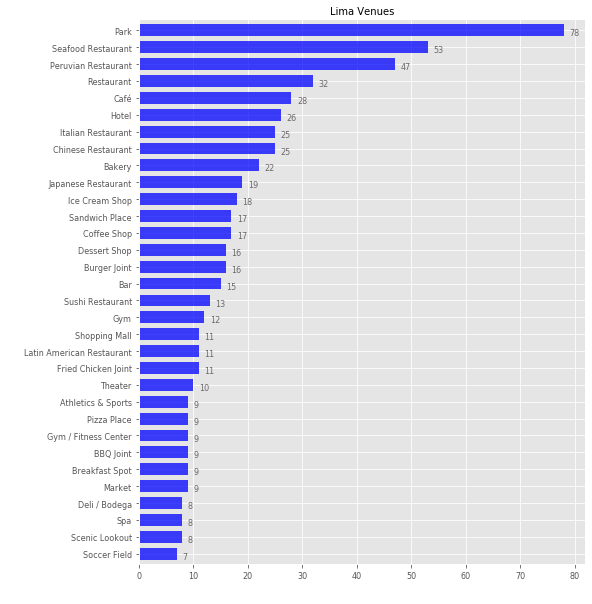

In [64]:
ax = lima_venues_kind.plot(kind='barh', alpha=0.75, figsize=(8, 10), width=0.7, color='b')
ax.set_title('Lima Venues', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(True)
ax.tick_params(labelsize=8)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for index, value in enumerate(lima_venues_kind): 
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value +1, index -0.3), color ='dimgray', fontsize=8)
plt.savefig(fname='lima venues.png',format='png', dpi=600, bbox_inches="tight")

In [65]:
#Create a dataframe only with relevant information
lima_data_venues=lima_venues[['Neighborhood', 'Venue Latitude', 'Venue Longitude', 'Venue Category', 'Venue']]
lima_data_venues.head()

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue
0,San Miguel,-12.081012,-77.082683,Accessories Store,Do it!
1,Lima,-12.057406,-77.030081,American Restaurant,Tony Roma's
2,Lima,-12.066808,-77.047318,American Restaurant,Chili's
3,San Miguel,-12.076010,-77.084234,American Restaurant,T.G.I. Fridays
4,San Miguel,-12.078503,-77.087624,American Restaurant,T.G.I. Friday's


In [66]:
# create map of Lima Venues using latitude and longitude values
map_lima_venues = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, category in zip(lima_data_venues['Venue Latitude'], lima_data_venues['Venue Longitude'], lima_data_venues['Venue Category']):
    label = '{}'.format(category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lima_venues)  
    
map_lima_venues

In [67]:
lima_data_venues.groupby('Venue Category').count()

,Neighborhood,Venue Latitude,Venue Longitude,Venue
Venue Category,,,,
Accessories Store,1,1,1,1
American Restaurant,5,5,5,5
Arcade,2,2,2,2
Arepa Restaurant,1,1,1,1
Art Gallery,5,5,5,5
...,...,...,...,...
Vietnamese Restaurant,1,1,1,1
Water Park,1,1,1,1
Wings Joint,1,1,1,1


Let's focus only in restaurants, so select only venues wth 'restaurat' word

In [68]:
lima_rest=lima_data_venues[lima_data_venues['Venue Category'].str.contains('Restaurant')]
lima_rest.reset_index(drop=True, inplace=True)
lima_rest.head()

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue
0,Lima,-12.057406,-77.030081,American Restaurant,Tony Roma's
1,Lima,-12.066808,-77.047318,American Restaurant,Chili's
2,San Miguel,-12.076010,-77.084234,American Restaurant,T.G.I. Fridays
3,San Miguel,-12.078503,-77.087624,American Restaurant,T.G.I. Friday's
4,Barranco,-12.128879,-77.026603,American Restaurant,Social Restaurant


In [69]:
lima_rest.shape

(272, 5)

In [70]:
lima_rest_org=((lima_rest['Venue Category'].value_counts()).sort_values(ascending=True))
lima_rest_org.shape

(30,)

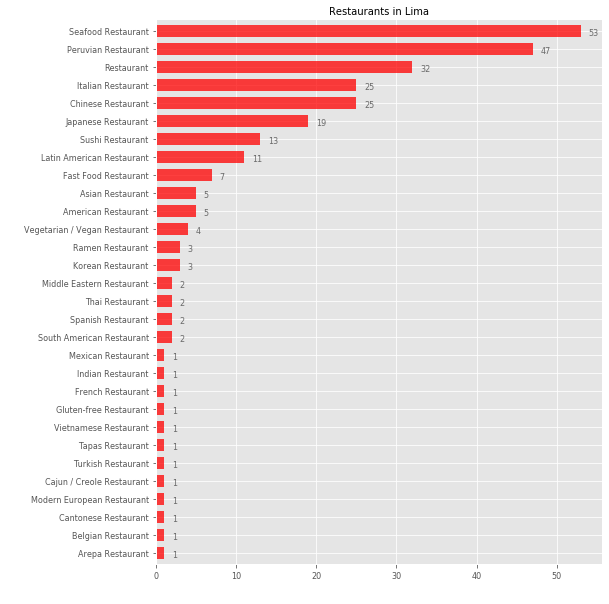

In [71]:
ax = lima_rest_org.plot(kind='barh', alpha=0.75, figsize=(8, 10), width=0.7, color='r')
ax.set_title('Restaurants in Lima', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(True)
ax.tick_params(labelsize=8)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for index, value in enumerate(lima_rest_org): 
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value +1, index -0.2), color ='dimgray', fontsize=8)
plt.savefig(fname='restaurants in lima.png',format='png', dpi=600, bbox_inches="tight")

Let's group the restaurants in categories: \
1° group:This category will group all "Peruvian Restaurant" also "Seafood Restaurant" since correspond also to peruvian \ food. We will also include the "Restaurant" labeled data because from a review the dishes correspond to peruvian. Also \ after review the data of "South American Restaurant" and "Latin American Restaurant" belongs to peruvian food. \
2° group: Italian \
3° group: Chinesse \
4° group: Japanesse: This category will include the data labeled as "Japanesse Restaurant", "Sushi Restaurant" 
and "Ramen Restaurants". \
5° group: Foreign: All the foreign restaurants, excepts Italian, Japanesse and Chinesse. \
6° group: Vegan: All vegan restaurants including "Gluten free Restaurant" \
7° group: Fast food.

In [72]:
lima_rest['Venue Category'][lima_rest['Venue Category'] == 'Seafood Restaurant']='Peruvian Restaurant'
lima_rest['Venue Category'][lima_rest['Venue Category'] == 'Restaurant']='Peruvian Restaurant'
lima_rest['Venue Category'][lima_rest['Venue Category'] == 'South American Restaurant']='Peruvian Restaurant'
lima_rest['Venue Category'][lima_rest['Venue Category'] == 'Latin American Restaurant']='Peruvian Restaurant'
lima_rest['Venue Category'][lima_rest['Venue Category'] == 'Sushi Restaurant']='Japanese Restaurant'
lima_rest['Venue Category'][lima_rest['Venue Category'] == 'Gluten-free Restaurant']='Vegetarian / Vegan Restaurant'
lima_rest['Venue Category'][lima_rest['Venue Category'] == 'Ramen Restaurant']='Japanese Restaurant'

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [73]:
lima_rest.head()

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue
0,Lima,-12.057406,-77.030081,American Restaurant,Tony Roma's
1,Lima,-12.066808,-77.047318,American Restaurant,Chili's
2,San Miguel,-12.076010,-77.084234,American Restaurant,T.G.I. Fridays
3,San Miguel,-12.078503,-77.087624,American Restaurant,T.G.I. Friday's
4,Barranco,-12.128879,-77.026603,American Restaurant,Social Restaurant


In [74]:
lima_rest_filt=lima_rest.sort_values('Venue Category', ascending=True)

In [53]:
#lima_rest_filt.to_csv('lima_rest_filt.csv')

In [75]:
lima_rest_filt.loc[lima_rest_filt['Venue Category'] == 'Tapas Restaurant']

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue
263,Pueblo Libre,-12.076303,-77.082342,Tapas Restaurant,Jaleo - Tapas & Bar


In [76]:
lima_rest_filt.loc[lima_rest_filt['Venue Category'] == 'Comfort Food Restaurant']

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue


In [77]:
lima_rest_filt.loc[lima_rest_filt['Venue Category'] == 'Cajun / Creole Restaurant']

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue
12,La Victoria,-12.085771,-77.016187,Cajun / Creole Restaurant,Don Alfredo


In [78]:
lima_rest_filt.loc[lima_rest_filt['Venue'] == 'Chifa Cinco Estrellas']

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue
10,Surquillo,-12.100713,-76.998409,Asian Restaurant,Chifa Cinco Estrellas


In [79]:
lima_rest_filt.loc[lima_rest_filt['Venue'] == 'Chifa Wang Xiang Yuan']

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue
6,San Borja,-12.102375,-77.001274,Asian Restaurant,Chifa Wang Xiang Yuan


In [80]:
lima_rest_filt.loc[lima_rest_filt['Venue'] == 'Chifa Fu Hua']

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue


In [81]:
lima_rest_filt.loc[lima_rest_filt['Venue'] == 'Rustica']

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue
128,San Miguel,-12.078412,-77.079238,Peruvian Restaurant,Rustica


We will drop the "Tapas Restaurant" since in this case is not really a restaurant is more a bar which offers snacks \
also will drop the "Confort Food Restaurant" since is a combination of café and diferents kinds of food \
and due to the dishes. Let's label "Cajun / Creole Restaurant" as "Peruvian Restaurants". From the Asian restaurants \
we will rename two of them as Chinesse since correspond to this category.

Rename one Italian Restaurant to Peruvian \
Restaurant since the most of its food correspond to this category $. Finaly we rename all the rest of restaurants as \
'Foreign Restaurants'

In [82]:
lima_rest_filt.drop([263,], inplace=True)
#lima_rest.drop([227,], inplace=True)
lima_rest_filt.at[12, 'Venue Category'] = 'Peruvian Restaurant'
lima_rest_filt.at[10, 'Venue Category'] = 'Chinese Restaurant'
lima_rest_filt.at[6, 'Venue Category'] = 'Chinese Restaurant'
#lima_rest_filt.at[33, 'Venue Category'] = 'Chinese Restaurant'
#lima_rest_filt.at[231, 'Venue Category'] = 'Peruvian Restaurant'
lima_rest_filt.reset_index(drop=True,inplace=True)

In [83]:
lima_rest_filt.head()

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue
0,Lima,-12.057406,-77.030081,American Restaurant,Tony Roma's
1,Lima,-12.066808,-77.047318,American Restaurant,Chili's
2,San Miguel,-12.076010,-77.084234,American Restaurant,T.G.I. Fridays
3,San Miguel,-12.078503,-77.087624,American Restaurant,T.G.I. Friday's
4,Barranco,-12.128879,-77.026603,American Restaurant,Social Restaurant


## Let's plot the categories

In [84]:
mask = (lima_rest_filt['Venue Category'] != 'Peruvian Restaurant') & (lima_rest_filt['Venue Category'] != \
'Japanese Restaurant') & (lima_rest_filt['Venue Category'] != 'Chinese Restaurant') & (lima_rest_filt['Venue Category'] \
!= 'Italian Restaurant') & (lima_rest_filt['Venue Category'] != 'Vegetarian / Vegan Restaurant') & \
(lima_rest_filt['Venue Category'] != 'Fast Food Restaurant') 
lima_rest_filt['Venue Category'][mask] = 'Foreign Restaurant'

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [71]:
#lima_rest_filt.to_csv('lima_rest_filt.csv')

In [85]:
lima_rest_filt.head()

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue
0,Lima,-12.057406,-77.030081,Foreign Restaurant,Tony Roma's
1,Lima,-12.066808,-77.047318,Foreign Restaurant,Chili's
2,San Miguel,-12.076010,-77.084234,Foreign Restaurant,T.G.I. Fridays
3,San Miguel,-12.078503,-77.087624,Foreign Restaurant,T.G.I. Friday's
4,Barranco,-12.128879,-77.026603,Foreign Restaurant,Social Restaurant


In [86]:
lima_rest_filt_org=((lima_rest_filt['Venue Category'].value_counts()).sort_values(ascending=True))
lima_rest_filt_org.shape

(7,)

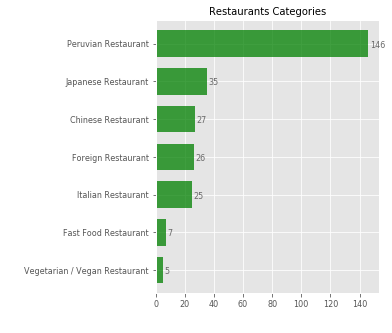

In [87]:
ax = lima_rest_filt_org.plot(kind='barh', alpha=0.75, figsize=(4, 5), width=0.7, color='g')
ax.set_title('Restaurants Categories', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(True)
ax.tick_params(labelsize=8)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for index, value in enumerate(lima_rest_filt_org): 
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value +1, index -0.1), color ='dimgray', fontsize=8)
plt.savefig(fname='Restaurants Categories.png',format='png', dpi=600, bbox_inches="tight")

In [88]:
lima_rest_filt['Venue Category'] = lima_rest_filt['Venue Category'].astype('category')
lima_rest_filt['Venue Category'].dtypes

CategoricalDtype(categories=['Chinese Restaurant', 'Fast Food Restaurant',
                  'Foreign Restaurant', 'Italian Restaurant',
                  'Japanese Restaurant', 'Peruvian Restaurant',
                  'Vegetarian / Vegan Restaurant'],
                 ordered=False)

In [89]:
lima_rest_filt['Venue Cluster'] = lima_rest_filt['Venue Category'].cat.codes

In [90]:
lima_rest_filt.head()

,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue,Venue Cluster
0,Lima,-12.057406,-77.030081,Foreign Restaurant,Tony Roma's,2
1,Lima,-12.066808,-77.047318,Foreign Restaurant,Chili's,2
2,San Miguel,-12.076010,-77.084234,Foreign Restaurant,T.G.I. Fridays,2
3,San Miguel,-12.078503,-77.087624,Foreign Restaurant,T.G.I. Friday's,2
4,Barranco,-12.128879,-77.026603,Foreign Restaurant,Social Restaurant,2


In [79]:
#lima_data_venues_filt.head(20)

In [91]:
#kcategory=lima_data_venues_filt.groupby('Venue Category Cat').count()
kclusters=7

In [92]:
# create map
map_rest_filt = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lima_rest_filt['Venue Latitude'], lima_rest_filt['Venue Longitude'], lima_rest_filt['Venue Category'], lima_rest_filt['Venue Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_rest_filt)
       
map_rest_filt

In [149]:
#map_rest_filt.save('mapa_lima_rest.png', format='png', dpi=600, bbox_inches="tight")

Let's focus only in the main 4 categories: Peruvian, Chinese, Italian and Japanese restaurants since are the most commons. 

In [93]:
lima_rest_filt['Venue Category'] = lima_rest_filt['Venue Category'].astype('str')

In [94]:
lima_restsh=lima_rest_filt.sort_values('Venue Category', ascending=True)
lima_restsh.drop('Venue Cluster',axis=1,inplace=True)
lima_restsh.set_index('Venue Category', inplace=True)
lima_restsh.drop('Fast Food Restaurant', inplace=True)
lima_restsh.drop('Foreign Restaurant', inplace=True)
lima_restsh.drop('Vegetarian / Vegan Restaurant', inplace=True)
lima_restsh.reset_index(inplace=True)
lima_restsh.head()

,Venue Category,Neighborhood,Venue Latitude,Venue Longitude,Venue
0,Chinese Restaurant,San Miguel,-12.066615,-77.104151,Chifa Girasoles
1,Chinese Restaurant,La Victoria,-12.089957,-77.015903,Chifa Titi
2,Chinese Restaurant,Barranco,-12.127137,-77.017916,Chifa Kam Men
3,Chinese Restaurant,San Isidro,-12.096376,-77.020771,Lung Fung
4,Chinese Restaurant,Jesús María,-12.074839,-77.051981,Mr. Shao


In [95]:
lima_restsh.loc[lima_restsh['Venue Category'] == 'Foreign Restaurant']

,Venue Category,Neighborhood,Venue Latitude,Venue Longitude,Venue


In [96]:
#lima_rest_filt.to_csv('lima_rest_filt.csv')
lima_restsh.groupby('Venue Category').count()

,Neighborhood,Venue Latitude,Venue Longitude,Venue
Venue Category,,,,
Chinese Restaurant,27,27,27,27
Italian Restaurant,25,25,25,25
Japanese Restaurant,35,35,35,35
Peruvian Restaurant,146,146,146,146


In [97]:
lima_restsh_org=((lima_restsh['Venue Category'].value_counts()).sort_values(ascending=True))
lima_restsh_org.shape

(4,)

In [98]:
lima_restsh_org.head()

Italian Restaurant      25
Chinese Restaurant      27
Japanese Restaurant     35
Peruvian Restaurant    146
Name: Venue Category, dtype: int64

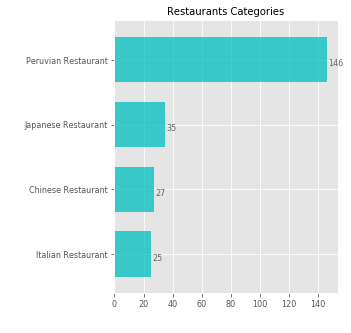

In [99]:
ax = lima_restsh_org.plot(kind='barh', alpha=0.75, figsize=(4, 5), width=0.7, color='c')
ax.set_title('Restaurants Categories', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(True)
ax.tick_params(labelsize=8)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for index, value in enumerate(lima_restsh_org): 
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value +1, index -0.1), color ='dimgray', fontsize=8)
plt.savefig(fname='Restaurants Categories1.png',format='png', dpi=600, bbox_inches="tight")

In [100]:
# one hot encoding
lima_restsh_onehot = pd.get_dummies(lima_restsh[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lima_restsh_onehot['Neighborhood'] = lima_restsh['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [lima_restsh_onehot.columns[-1]] + list(lima_restsh_onehot.columns[:-1])
lima_restsh_onehot = lima_restsh_onehot[fixed_columns]

lima_restsh_onehot.head()

,Neighborhood,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Peruvian Restaurant
0,San Miguel,1,0,0,0
1,La Victoria,1,0,0,0
2,Barranco,1,0,0,0
3,San Isidro,1,0,0,0
4,Jesús María,1,0,0,0


In [101]:
lima_restsh_gr = lima_restsh_onehot.groupby('Neighborhood').sum()
lima_restsh_gr.sort_values(by='Peruvian Restaurant', ascending=False, inplace=True)
lima_restsh_gr = lima_restsh_gr[['Peruvian Restaurant','Japanese Restaurant','Chinese Restaurant','Italian Restaurant']]
lima_restsh_gr.head()

,Peruvian Restaurant,Japanese Restaurant,Chinese Restaurant,Italian Restaurant
Neighborhood,,,,
La Victoria,28,6,1,4
Barranco,14,0,2,0
San Miguel,13,2,3,0
San Isidro,12,5,2,2
Lince,11,1,1,1


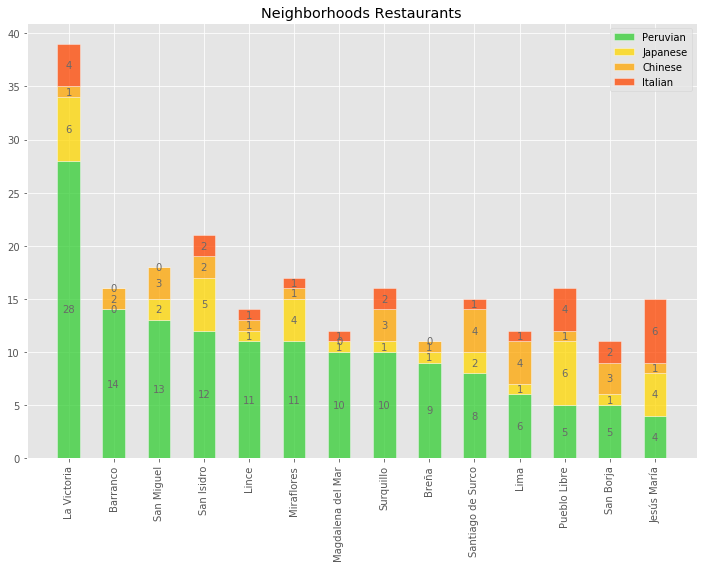

In [102]:
#Get values from the group and categories
#index = ["Q1", "Q2", "Q3", "Q4"]
peruvian = lima_restsh_gr['Peruvian Restaurant']
japanese = lima_restsh_gr['Japanese Restaurant']
chinese = lima_restsh_gr['Chinese Restaurant']
italian = lima_restsh_gr['Italian Restaurant']

#add colors
colors = ['limegreen', 'gold','orange','orangered']
# The position of the bars on the x-axis
r = range(len(lima_restsh_gr))
barWidth = 0.5
#plot bars
plt.figure(figsize=(12,8))
ax1 = plt.bar(r, peruvian, alpha=0.75, color=colors[0], edgecolor='white', width=barWidth, label="Peruvian")
ax2 = plt.bar(r, japanese, alpha=0.75, bottom=np.array(peruvian), color=colors[1], edgecolor='white', width=barWidth, label='Japanese')
ax3 = plt.bar(r, chinese, alpha=0.75, bottom=np.array(peruvian)+np.array(japanese), color=colors[2], edgecolor='white', width=barWidth, label='Chinese')
ax4 = plt.bar(r, italian, alpha=0.75, bottom=np.array(peruvian)+np.array(japanese)+np.array(chinese), color=colors[3], edgecolor='white', width=barWidth, label='Italian')
plt.legend()
# Custom X axis
plt.xticks(r, list(lima_restsh_gr.index), fontweight='normal', rotation=90)
plt.ylabel('')
plt.title('Neighborhoods Restaurants')
for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1/2, "%d" % h1, ha="center", va="center", color="dimgray", fontsize=10, fontweight="normal")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="dimgray", fontsize=10, fontweight="normal")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d" % h3, ha="center", va="center", color="dimgray", fontsize=10, fontweight="normal")
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%d" % h4, ha="center", va="center", color="dimgray", fontsize=10, fontweight="normal")
plt.savefig(fname='neighborhoods restaurant.png',format='png', dpi=600, bbox_inches="tight")
plt.show()

In [103]:
lima_restsh_gror=lima_restsh_gr
lima_restsh_gror.reset_index(inplace=True)

In [104]:
lima_restsh_gror.head(15)

,Neighborhood,Peruvian Restaurant,Japanese Restaurant,Chinese Restaurant,Italian Restaurant
0,La Victoria,28,6,1,4
1,Barranco,14,0,2,0
2,San Miguel,13,2,3,0
3,San Isidro,12,5,2,2
4,Lince,11,1,1,1
5,Miraflores,11,4,1,1
6,Magdalena del Mar,10,1,0,1
7,Surquillo,10,1,3,2
8,Breña,9,1,1,0
9,Santiago de Surco,8,2,4,1


In [105]:
max_norm_per=lima_restsh_gror['Peruvian Restaurant'].max()
min_norm_per=lima_restsh_gror['Peruvian Restaurant'].min()
max_norm_jap=lima_restsh_gror['Japanese Restaurant'].max()
min_norm_jap=lima_restsh_gror['Japanese Restaurant'].min()
max_norm_chi=lima_restsh_gror['Chinese Restaurant'].max()
min_norm_chi=lima_restsh_gror['Chinese Restaurant'].min()
max_norm_ita=lima_restsh_gror['Italian Restaurant'].max()
min_norm_ita=lima_restsh_gror['Italian Restaurant'].min()

In [106]:
# normalize Peruvian data
norm_peruvian = (lima_restsh_gror['Peruvian Restaurant'] - min_norm_per) / (max_norm_per - min_norm_per)

# normalize Japanese data
norm_japanese = (lima_restsh_gror['Japanese Restaurant'] - min_norm_jap) / (max_norm_jap - min_norm_jap)

# normalize Chinese data
norm_chinese = (lima_restsh_gror['Chinese Restaurant'] - min_norm_chi) / (max_norm_chi - min_norm_chi)

# normalize Chinese data
norm_italian = (lima_restsh_gror['Italian Restaurant'] - min_norm_ita) / (max_norm_ita - min_norm_ita)

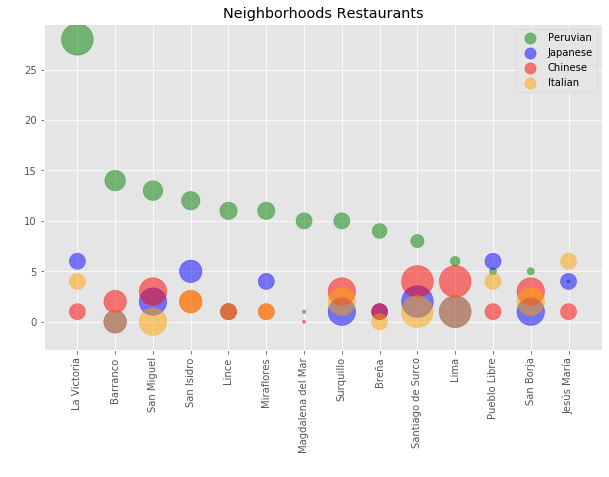

In [107]:
# Peruvian
ax0 = lima_restsh_gror.plot(kind='scatter',
                    x='Neighborhood',
                    y='Peruvian Restaurant',
                    figsize=(10, 6),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_peruvian * 1000 + 10,  # pass in weights 
                    )
# Japanese
ax1 = lima_restsh_gror.plot(kind='scatter',
                    x='Neighborhood',
                    y='Japanese Restaurant',
                    alpha=0.5,
                    color="blue",
                    s=norm_chinese * 1000 + 10,
                    ax=ax0
                    )
# Chinese
ax2 = lima_restsh_gror.plot(kind='scatter',
                    x='Neighborhood',
                    y='Chinese Restaurant',
                    alpha=0.5,
                    color="red",
                    s=norm_chinese * 1000 + 10,
                    ax=ax0
                    )       
# Italian
ax3 = lima_restsh_gror.plot(kind='scatter',
                    x='Neighborhood',
                    y='Italian Restaurant',
                    alpha=0.5,
                    color="orange",
                    s=norm_chinese * 1000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel(' ')
ax0.set_xlabel(' ')
ax0.set_title('Neighborhoods Restaurants')
ax0.legend(['Peruvian', 'Japanese','Chinese','Italian'], loc='upper right', fontsize='medium', markerscale=0.5)
ax0.tick_params(axis='x', labelrotation=90)
plt.savefig(fname='neighborhoods restaurant1.png',format='png', dpi=600, bbox_inches="tight")

In [108]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
lima_rest_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
restaurants = plugins.MarkerCluster().add_to(lima_rest_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(lima_restsh['Venue Latitude'], lima_restsh['Venue Longitude'], lima_restsh['Venue Category']):
    folium.Marker(location=[lat, lng], icon=None, popup=label).add_to(restaurants)

# display map
lima_rest_map

In [109]:
lima_restsh_gror['Total']=lima_restsh_gror['Peruvian Restaurant'] + lima_restsh_gror['Chinese Restaurant'] + lima_restsh_gror['Italian Restaurant'] + lima_restsh_gror['Japanese Restaurant']
lima_restsh_gror.head()

,Neighborhood,Peruvian Restaurant,Japanese Restaurant,Chinese Restaurant,Italian Restaurant,Total
0,La Victoria,28,6,1,4,39
1,Barranco,14,0,2,0,16
2,San Miguel,13,2,3,0,18
3,San Isidro,12,5,2,2,21
4,Lince,11,1,1,1,14


Change the Neighborhoods name to capital letters in order to match GeoJson file

In [99]:
#lima_restsh_gror['Neighborhood'] = lima_restsh_gror['Neighborhood'].str.upper()

In [110]:
lima_restsh_gror['Neighborhood']= lima_restsh_gror['Neighborhood'].replace('Jesús María', 'Jesus Maria')

In [87]:
lima_restsh_gror.head(15)

,Neighborhood,Peruvian Restaurant,Japanese Restaurant,Chinese Restaurant,Italian Restaurant,Total
0,La Victoria,28,6,1,4,39
1,Barranco,14,0,2,0,16
2,San Miguel,13,2,3,0,18
3,San Isidro,12,5,2,2,21
4,Lince,11,1,1,1,14
5,Miraflores,11,4,1,1,17
6,Magdalena del Mar,10,1,0,1,12
7,Surquillo,10,1,3,2,16
8,Breña,9,1,1,0,11
9,Santiago de Surco,8,2,4,1,15


In [88]:
lima_geo = r'distritos_cut.geojson' # geojson file
lima_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [89]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
lima_map.choropleth(
    geo_data=lima_geo,
    data=lima_restsh_gror,
    columns=['Neighborhood', 'Total'],
    key_on='properties.name_3',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Restaurants in Lima'
)
# display map
lima_map